
Would you like to process
MOD04_3K.A2015091.1750.006.2015092021418.hdf

(Y/N)y
This is a 3km MODIS file. Here is some information: 
('\nThe valid range of values is: ', -0.1, ' to ', 5.0, '\nThe average is: ', 0.19, '\nThe standard deviation is: ', 0.129)
('The range of latitude in this file is: ', 38.251072, ' to ', 60.049126, 'degrees \nThe range of longitude in this file is: ', -117.88256, ' to ', -78.854889, ' degrees')

Would you like to create a map of this data? Please enter Y or N 
y


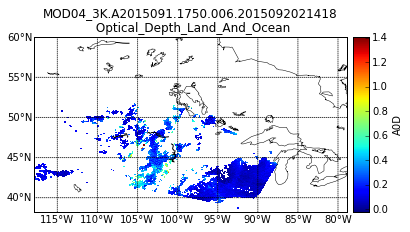


Would you like to save this map? Please enter Y or N 
n

All valid files have been processed.


In [36]:
#!/usr/bin/python
'''
Module: read_and_map_mod_aerosol.py
==========================================================================================
Disclaimer: The code is for demonstration purposes only. Users are responsible to check for accuracy and revise to fit their objective.

Author: Justin Roberts-Pierel, 2015 
Organization: NASA ARSET
Purpose: To extract AOD data from a MODIS HDF4 file (or series of files) and create a map of the resulting data

See the README associated with this module for more information.
==========================================================================================
'''

#import necessary modules
from pyhdf import SD
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import sys

#This uses the file "fileList.txt", containing the list of files, in order to read the files
try:
	fileList=open('fileList.txt','r')
except:
	print('Did not find a text file containing file names (perhaps name does not match)')
	sys.exit()

#loops through all files listed in the text file
for FILE_NAME in fileList:
	FILE_NAME=FILE_NAME.strip()
	user_input=raw_input('\nWould you like to process\n' + FILE_NAME + '\n\n(Y/N)')
	if(user_input == 'N' or user_input == 'n'):
		continue
	else:
		if '3K' in FILE_NAME:#then this is a 3km MODIS file
			print('This is a 3km MODIS file. Here is some information: ')
			SDS_NAME='Optical_Depth_Land_And_Ocean' # The name of the sds to read
		elif 'L2' in FILE_NAME: #Same as above but for 10km MODIS file
			print('This is a 10km MODIS file. Here is some information: ')
			SDS_NAME='AOD_550_Dark_Target_Deep_Blue_Combined'
		else:#if it is neither 3km nor 10km, then this will skip the rest of this loop iteration
			print('The file :',FILE_NAME, ' is not a valid MODIS file (Or is named incorrectly). \n')
			continue
		try:
			# open the hdf file for reading
			hdf=SD.SD(FILE_NAME)
		except:
			print('Unable to open file: \n' + FILE_NAME + '\n Skipping...')
			continue
		
		# Get lat and lon info
		lat = hdf.select('Latitude')
		latitude = lat[:]
		min_lat=latitude.min()
		max_lat=latitude.max()
		lon = hdf.select('Longitude')
		longitude = lon[:]
		min_lon=longitude.min()
		max_lon=longitude.max()
		
		#get AOD SDS, or exit if it doesn't find the SDS in the file
		try:
			sds=hdf.select(SDS_NAME)
		except:
			print('Sorry, your MODIS hdf file does not contain the SDS:',SDS_NAME,'. Please try again with the correct file type.')
			sys.exit()
		#get scale factor for AOD SDS
		attributes=sds.attributes()
		scale_factor=attributes['scale_factor']
		#get valid range for AOD SDS
		range=sds.getrange()
		min_range=min(range)
		max_range=max(range)
		
		#get SDS data
		data=sds.get()
		#get data within valid range
		valid_data=data.ravel()
		valid_data=[x for x in valid_data if x>=min_range]
		valid_data=[x for x in valid_data if x<=max_range]
		valid_data=np.asarray(valid_data)
		#scale the valid data
		valid_data=valid_data*scale_factor
		#find the average
		average=sum(valid_data)/len(valid_data)
		#find the standard deviation
		stdev=np.std(valid_data)
		#print information
		print('\nThe valid range of values is: ',round(min_range*scale_factor,3), ' to ',round(max_range*scale_factor,3),'\nThe average is: ',round(average,3),'\nThe standard deviation is: ',round(stdev,3))
		print('The range of latitude in this file is: ',min_lat,' to ',max_lat, 'degrees \nThe range of longitude in this file is: ',min_lon, ' to ',max_lon,' degrees')
		
		#Asks user if they would like to see a map
		is_map=str(raw_input('\nWould you like to create a map of this data? Please enter Y or N \n'))
		#if user would like a map, view it
		if is_map == 'Y' or is_map == 'y':
			attrs = sds.attributes(full=1)
			fillvalue=attrs['_FillValue']
			# fillvalue[0] is the attribute value (-9999)
			fv = fillvalue[0]
			#turn fillvalues to NaN
			data=data.astype(float)
			data[data == fv] = np.nan
			#create the map
			data = np.ma.masked_array(data, np.isnan(data))
			m = Basemap(projection='cyl', resolution='l', llcrnrlat=min_lat, urcrnrlat = max_lat, llcrnrlon=min_lon, urcrnrlon = max_lon)
			m.drawcoastlines(linewidth=0.5)
			m.drawparallels(np.arange(-90., 120., 5.), labels=[1, 0, 0, 0])
			m.drawmeridians(np.arange(-180., 181., 5.), labels=[0, 0, 0, 1])
			x, y = m(longitude, latitude)
			m.pcolormesh(x, y, data*scale_factor)
			plt.autoscale()
			#create colorbar
			cb = m.colorbar()
			#label colorboar
			cb.set_label('A0D')
			
			#title the plot
			plotTitle=FILE_NAME[:-4]
			plt.title('{0}\n {1}'.format(plotTitle, SDS_NAME))
			fig = plt.gcf()
			# Show the plot window.
			plt.show()
			#once you close the map it asks if you'd like to save it
			is_save=str(raw_input('\nWould you like to save this map? Please enter Y or N \n'))
			if is_save == 'Y' or is_save == 'y':
				#saves as a png if the user would like
				pngfile = '{0}.png'.format(plotTitle)
				fig.savefig(pngfile)
print('\nAll valid files have been processed.')

In [101]:
AAAA=np.around(longitude,1)
BBBB=np.around(latitude,1)

In [104]:
(AAAA==-92.).sum()

858

In [108]:
(BBBB==42.).sum()

1611

In [109]:
filter=((BBBB==42.0)*(AAAA==-92.0))
filter.sum()

4

In [110]:
data=sds.get()
data=data.astype(float)
data[data == fv] = np.nan

In [113]:
data[filter]*scale_factor


array([ 0.035,  0.044,  0.053,  0.052])

In [114]:
longitude[filter]


array([-91.98666382, -91.98523712, -92.00563049, -92.02577972], dtype=float32)

In [115]:
latitude[filter]

array([ 42.02425766,  42.04178619,  41.99837875,  41.95491791], dtype=float32)

In [97]:
pm25

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- 13.268800212256611 ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True False ...,  True  True  True]],
       fill_value = 1e+20)

In [27]:
(data==fv).sum()*1./(data.shape[0]*data.shape[1])

0.933704194492187

In [28]:
data.shape

(676, 451)

In [2]:
scale_factor

0.0010000000474974513

In [12]:
%matplotlib inline

In [18]:
data

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- 152.0 ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True False ...,  True  True  True]],
       fill_value = 1e+20)

In [15]:
attributes

{'Cell_Across_Swath_Sampling': [1, 1354, 3],
 'Cell_Along_Swath_Sampling': [1, 676, 3],
 'Geolocation_Pointer': 'Internal geolocation arrays',
 'Parameter_Type': 'Output',
 '_FillValue': -9999L,
 'add_offset': 0.0,
 'long_name': 'AOT at 0.55 micron for both ocean (Average) (Quality flag=1,2,3) and land (corrected) (Quality flag=3)',
 'scale_factor': 0.0010000000474974513,
 'units': 'None',
 'valid_range': [-100L, 5000L]}

In [14]:
attrs

{'Cell_Across_Swath_Sampling': ([1, 1354, 3], 8, 24, 3),
 'Cell_Along_Swath_Sampling': ([1, 676, 3], 7, 24, 3),
 'Geolocation_Pointer': ('Internal geolocation arrays', 9, 4, 27),
 'Parameter_Type': ('Output', 6, 4, 6),
 '_FillValue': (-9999L, 1, 22, 1),
 'add_offset': (0.0, 5, 6, 1),
 'long_name': ('AOT at 0.55 micron for both ocean (Average) (Quality flag=1,2,3) and land (corrected) (Quality flag=3)',
  2,
  4,
  102),
 'scale_factor': (0.0010000000474974513, 4, 6, 1),
 'units': ('None', 3, 4, 4),
 'valid_range': ([-100L, 5000L], 0, 22, 2)}

(array([  7.97400000e+03,   7.81600000e+03,   3.02900000e+03,
          1.08000000e+03,   2.20000000e+02,   5.90000000e+01,
          2.30000000e+01,   6.00000000e+00,   4.00000000e+00,
          1.00000000e+00]),
 array([-0.018     ,  0.12460001,  0.26720001,  0.40980002,  0.55240003,
         0.69500003,  0.83760004,  0.98020005,  1.12280005,  1.26540006,
         1.40800007]),
 <a list of 10 Patch objects>)

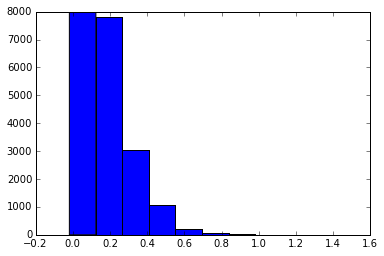

In [13]:
plt.hist(valid_data)

In [11]:
average

0.18976965081052663

In [15]:
try:
	fileList=open('fileList.txt','r')
except:
	print('Did not find a text file containing file names (perhaps name does not match)')
	sys.exit()

In [17]:
fileList

<open file 'fileList.txt', mode 'r' at 0x7fbf99f24030>

In [18]:
for FILE_NAME in fileList:
	FILE_NAME=FILE_NAME.strip()
	print FILE_NAME

MOD04_3K.A2015091.1750.006.2015092021418.hdf


In [19]:
'\nWould you like to process\n' + FILE_NAME + '\n\n(Y/N)'

'\nWould you like to process\nMOD04_3K.A2015091.1750.006.2015092021418.hdf\n\n(Y/N)'

In [46]:
filename1='2A12.20150408.99100.7.HDF'

In [47]:
filename1

'3A12.20150301.7.HDF'

In [48]:
hdf=SD.SD(filename1)

In [49]:
hdf.

In [33]:
lat = hdf.select('Latitude')
latitude = lat[:]
min_lat=latitude.min()
max_lat=latitude.max()
lon = hdf.select('Longitude')
longitude = lon[:]
min_lon=longitude.min()
max_lon=longitude.max()

print('The range of latitude in this file is: ',min_lat,' to ',max_lat, 'degrees \nThe range of longitude in this file is: ',min_lon, ' to ',max_lon,' degrees')


('The range of latitude in this file is: ', -38.390053, ' to ', 38.35376, 'degrees \nThe range of longitude in this file is: ', -177.61996, ' to ', 161.60867, ' degrees')


In [32]:
hdf.select('Latitude')[:].shape

(2875, 208)

In [31]:
hdf.select('Longitude')[:]

array([[-175.20471191, -175.24942017, -175.29385376, ..., -175.03926086,
        -174.9967041 , -174.95394897],
       [-175.05384827, -175.09860229, -175.14306641, ..., -174.90057373,
        -174.85804749, -174.81532288],
       [-174.90301514, -174.94779968, -174.99230957, ..., -174.76194763,
        -174.71943665, -174.67674255],
       ..., 
       [ 161.03927612,  160.99468994,  160.95036316, ...,  161.24609375,
         161.28875732,  161.33161926],
       [ 161.19003296,  161.145401  ,  161.1010437 , ...,  161.38468933,
         161.42732239,  161.47015381],
       [ 161.34083557,  161.29615784,  161.25175476, ...,  161.52325439,
         161.56587219,  161.6086731 ]], dtype=float32)

In [52]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

USE_NETCDF4 = False

def run(FILE_NAME):

    DATAFIELD_NAME = 'rainWater'

    if USE_NETCDF4:        
        from netCDF4 import Dataset
        # Retrieve the data.
        nc = Dataset(FILE_NAME)
        data = nc.variables[DATAFIELD_NAME][:].astype(np.float64)
        units = nc.variables[DATAFIELD_NAME].units
        # Retrieve the geolocation data.
        latitude = nc.variables['Latitude'][:]
        longitude = nc.variables['Longitude'][:]
        
    else:
        from pyhdf.SD import SD, SDC
        hdf = SD(FILE_NAME, SDC.READ)
        
        ds = hdf.select(DATAFIELD_NAME)
        data = ds[:,:].astype(np.double)

        # Handle scale/osffset attributes.
        attrs = ds.attributes(full=1)
        ua=attrs["units"]
        units = ua[0]

        # Retrieve the geolocation data.        
        lat = hdf.select('Latitude')
        latitude = lat[:,:]
        lon = hdf.select('Longitude')
        longitude = lon[:,:]

    
    # Construct an indexed version of the data.
    levels = [0.0, 0.1, 1.0, 10.0, 30.0]
    Z = np.zeros(data.shape, dtype=np.float64)
    for j in np.arange(len(levels)-1):
        Z[np.logical_and(data >= levels[j], data < levels[j+1])] = j  
    Z[data >= levels[-1]] = len(levels)
    
    
    # There is a wrap-around effect to deal with.  Adjust the longitude by
    # modulus 360 to avoid the swath being smeared.
    longitude[longitude < -165] += 360
    
    # Draw an equidistant cylindrical projection using the low resolution
    # coastline database.
    m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=-90, urcrnrlat = 90,
                llcrnrlon=-165, urcrnrlon = 197)
    
    m.drawcoastlines(linewidth=0.5)
    m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180, 180., 45.), labels=[0, 0, 0, 1])
    
    # Use a discretized colormap since we have only five levels.
    colors = ['#0000ff', '#0088ff', '#8888ff', '#ff8888', '#ff0000']
    cmap = mpl.colors.ListedColormap(colors)
    bounds = np.arange(6)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    m.pcolormesh(longitude, latitude, Z, latlon=True, cmap=cmap, norm=norm)
    basename = os.path.basename(FILE_NAME)    
    plt.title('{0}\n{1}'.format(basename, DATAFIELD_NAME))

    # Adjust colorbar height.
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "5%", pad="3%")
    color_bar = plt.colorbar(cax=cax)

    color_bar.set_ticks([0.5, 1.5, 2.5, 3.5, 4.5])
    color_bar.set_ticklabels(['0', '0.1', '1.0', '10', '30'])
    color_bar.set_label('Unit:'+units)

    fig = plt.gcf()
    # plt.show()
    
    pngfile = "{0}.py.png".format(basename)
    fig.savefig(pngfile)

if __name__ == "__main__":

    # If a certain environment variable is set, look there for the input
    # file, otherwise look in the current directory.
    hdffile = '3A12.20150301.7.HDF'
    try:
        hdffile = os.path.join(os.environ['HDFEOS_ZOO_DIR'], hdffile)
    except KeyError:
        pass

    run(hdffile)
    


HDF4Error: select: non-existent dataset

In [56]:
filename1='2A12.20150408.99100.7.HDF'
hdf=SD.SD(filename1)
hdf.datasets()

{'DayOfMonth': (('nscan',), (2875,), 20, 4),
 'DayOfYear': (('nscan',), (2875,), 22, 9),
 'FractionalGranuleNumber': (('nscan',), (2875,), 6, 21),
 'Hour': (('nscan',), (2875,), 20, 5),
 'Latitude': (('nscan', 'npixel'), (2875, 208), 5, 10),
 'Longitude': (('nscan', 'npixel'), (2875, 208), 5, 11),
 'MilliSecond': (('nscan',), (2875,), 22, 8),
 'Minute': (('nscan',), (2875,), 20, 6),
 'Month': (('nscan',), (2875,), 20, 3),
 'SCorientation': (('nscan',), (2875,), 22, 17),
 'Second': (('nscan',), (2875,), 20, 7),
 'SensorOrientationMatrix': (('nscan', 'fakeDim6', 'fakeDim7'),
  (2875, 3, 3),
  5,
  34),
 'Year': (('nscan',), (2875,), 22, 2),
 'acsMode': (('nscan',), (2875,), 20, 18),
 'chiSquared': (('nscan', 'npixel'), (2875, 208), 22, 43),
 'cloudWaterPath': (('nscan', 'npixel'), (2875, 208), 5, 50),
 'cluster': (('ncluster', 'nlayer', 'nfindex', 'nspecies'),
  (100, 28, 13, 6),
  5,
  1),
 'clusterNumber': (('nscan', 'npixel', 'nspecies'), (2875, 208, 6), 20, 57),
 'clusterScale': (('n

In [58]:
filename1='3A12.20150301.7.HDF'
hdf=SD.SD(filename1)
hdf.datasets()

{'InputAlgorithmVersions': (('fakeDim4',), (3436,), 3, 15),
 'InputFileNames': (('fakeDim3',), (12765,), 3, 14),
 'InputGenerationDateTimes': (('fakeDim5',), (12274,), 3, 16),
 'cldIce': (('nlayer', 'nlon', 'nlat'), (28, 720, 160), 5, 5),
 'cldWater': (('nlayer', 'nlon', 'nlat'), (28, 720, 160), 5, 3),
 'convectPrecipitation': (('nlon', 'nlat'), (720, 160), 5, 2),
 'fractionQuality0': (('nlon', 'nlat'), (720, 160), 5, 11),
 'fractionQuality1': (('nlon', 'nlat'), (720, 160), 5, 12),
 'fractionQuality2': (('nlon', 'nlat'), (720, 160), 5, 13),
 'graupel': (('nlayer', 'nlon', 'nlat'), (28, 720, 160), 5, 7),
 'latentHeat': (('nlayer', 'nlon', 'nlat'), (28, 720, 160), 5, 8),
 'npixPrecipitation': (('nlon', 'nlat'), (720, 160), 24, 10),
 'npixTotal': (('nlon', 'nlat'), (720, 160), 24, 9),
 'rainWater': (('nlayer', 'nlon', 'nlat'), (28, 720, 160), 5, 4),
 'snow': (('nlayer', 'nlon', 'nlat'), (28, 720, 160), 5, 6),
 'surfacePrecipitation': (('nlon', 'nlat'), (720, 160), 5, 0),
 'surfaceRain': (

In [63]:
hdf.select('rainWater')[:].shape

(28, 720, 160)

In [71]:
hdf.select('rainWater')[10,:,:]

array([[ -9.99990039e+03,  -9.99990039e+03,   9.26478999e-04, ...,
         -9.99990039e+03,  -9.99990039e+03,  -9.99990039e+03],
       [ -9.99990039e+03,  -9.99990039e+03,   3.16329078e-06, ...,
         -9.99990039e+03,  -9.99990039e+03,  -9.99990039e+03],
       [ -9.99990039e+03,  -9.99990039e+03,   3.46068259e-06, ...,
         -9.99990039e+03,  -9.99990039e+03,  -9.99990039e+03],
       ..., 
       [ -9.99990039e+03,  -9.99990039e+03,   0.00000000e+00, ...,
         -9.99990039e+03,  -9.99990039e+03,  -9.99990039e+03],
       [ -9.99990039e+03,  -9.99990039e+03,   2.38941993e-07, ...,
         -9.99990039e+03,  -9.99990039e+03,  -9.99990039e+03],
       [ -9.99990039e+03,  -9.99990039e+03,   1.39490748e-03, ...,
         -9.99990039e+03,  -9.99990039e+03,  -9.99990039e+03]], dtype=float32)

http://disc.gsfc.nasa.gov/uui/datasets/TRMM_3A12_V007/summary#documentation

http://hdfeos.org/zoo/index_openGESDISC_Examples.php

https://smyl.es/how-to-fix-ubuntudebian-apt-get-404-not-found-package-repository-errors-saucy-raring-quantal-oneiric-natty/?doing_wp_cron=1466006818.6556921005249023437500

http://scigeo.org/articles/howto-install-latest-geospatial-software-on-linux.html#environment_vars

http://arset.gsfc.nasa.gov/airquality/python-scripts-aerosol-data-sets-merra-modis-and-omi

http://stackoverflow.com/questions/21122540/python-input-error-nameerror-name-is-not-defined

http://pps.gsfc.nasa.gov/Documents/filespec.TRMM.V7.pdf

In [ ]:
http://hdfeos.org/zoo/index_openGESDISC_Examples.php